In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("bank_additional_full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

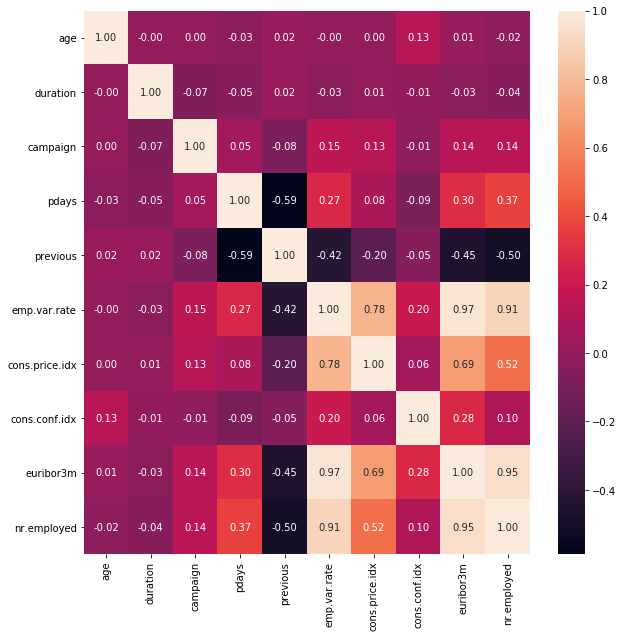

In [5]:
a = pd.DataFrame(df.dtypes)!=object
numeric = df[df.columns[a[0]]]
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(numeric.corr(),
           annot=True, fmt=".2f")

In [6]:
from sklearn.preprocessing import LabelEncoder

np.unique(df['y'])
class_le = LabelEncoder()
y = class_le.fit_transform(df['y'].values)

In [7]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [8]:
for i in range(0,6):
    df = df[~df.iloc[:,i+1].isin(["unknown"])]

In [9]:
edu_mapping = {'illiterate': 0,
                'basic.4y': 1,
                'basic.6y': 2,
               'basic.9y': 3,
               'high.school': 4,
               'professional.course':5,
               'university.degree': 6}

df['education'] = df['education'].map(edu_mapping)

In [10]:
df.isin(["unknown"]).any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [11]:
df1 = pd.get_dummies(df,drop_first=True)

In [12]:
df1

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
2,37,4,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
3,40,2,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
4,56,4,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
6,59,5,139,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,334,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,1
41184,46,5,383,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,0
41185,56,6,189,2,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,0
41186,44,5,442,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,1


In [13]:
df1[df1.y_yes==1]

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
88,49,3,1467,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,1
182,42,3,673,2,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,1
286,39,3,935,3,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,1,0,1
389,44,4,1030,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,1,0,1
446,42,5,1623,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,6,208,1,1,6,-1.1,94.767,-50.8,1.031,...,1,0,0,0,1,0,0,0,1,1
41178,62,6,483,2,6,3,-1.1,94.767,-50.8,1.031,...,1,0,0,0,1,0,0,0,1,1
41181,37,6,281,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,1
41183,73,5,334,1,999,0,-1.1,94.767,-50.8,1.028,...,1,0,0,0,0,0,0,1,0,1


In [14]:
df1.columns

Index(['age', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [15]:
df2 = df1.rename(columns = {'education':'edu_level'})

In [ ]:
df2.to_csv("processed_data.csv")

## 2. Model training

In [16]:
from sklearn.model_selection import train_test_split

X, y = df2.iloc[:, :-1].values, df2.iloc[:, -1].values

from sklearn.utils import resample

X_upsampled, y_upsampled = resample(X[y == 1],
    y[y == 1],
    replace=True,
    n_samples=X[y == 0].shape[0],
    random_state=123)

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [17]:


#X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                         test_size=0.3, 
#                         random_state=0, 
#                         stratify=y)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, 
                         test_size=0.3, 
                         random_state=0, 
                         stratify=y_bal)

In [19]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

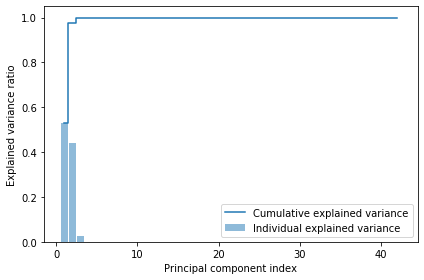

In [20]:
import numpy as np
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 43), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 43), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

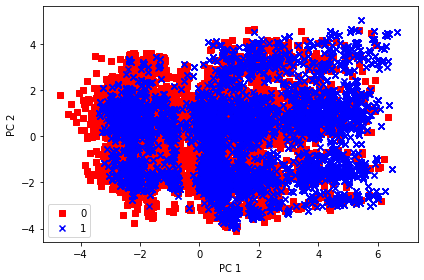

In [21]:
colors = ['r', 'b', 'g'] 
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers): 
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left') 
plt.tight_layout() 
plt.show()

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

### 2.1 LR

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs',max_iter=100000)
lr = lr.fit(X_train_pca, y_train)

y_pred = lr.predict(X_test_pca)
print('Test Accuracy: %.3f' % lr.score(X_test_pca, y_test))

Test Accuracy: 0.709


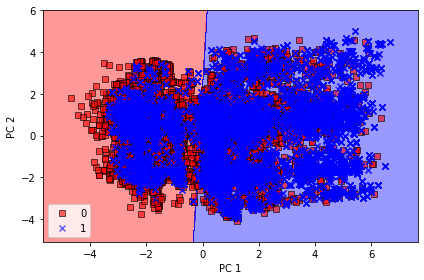

In [24]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

### 2.2 SVM

In [25]:
from sklearn.svm import SVC
    
svc = SVC(random_state=1)
svc = svc.fit(X_train_pca, y_train)

y_pred = svc.predict(X_test_pca)
print('Test Accuracy: %.3f' % svc.score(X_test_pca, y_test))

Test Accuracy: 0.709


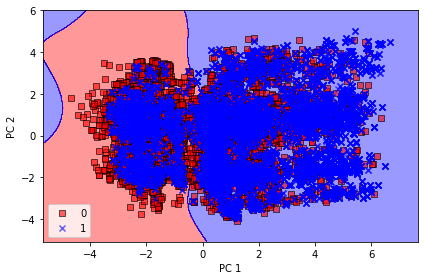

In [26]:
plot_decision_regions(X_train_pca, y_train, classifier=svc)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

### 2.3 Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('Test Accuracy: %.3f' % tree.score(X_test, y_test))

Test Accuracy: 0.889


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100, p=2, metric='minkowski') 
knn = knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)
print('Test Accuracy: %.3f' % knn.score(X_test_pca, y_test))

Test Accuracy: 0.723


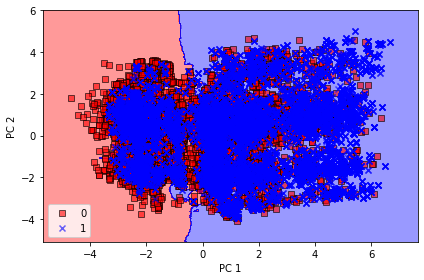

In [29]:
plot_decision_regions(X_train_pca, y_train, classifier=knn)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

## 3. Model Evaluation 

In [30]:
#  LR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid_lr=[{'C': [1,10, 1000, 1000, 10000, 100000]}]

gs = GridSearchCV(estimator=lr,
                  param_grid=param_grid_lr,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_pca, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7099785407725322
{'C': 1}


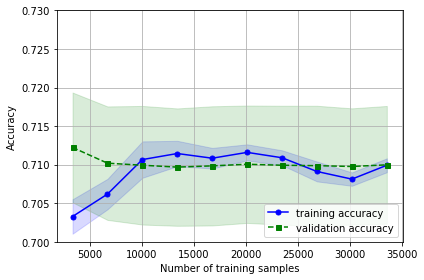

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve



train_sizes, train_scores, test_scores =\
                learning_curve(estimator=lr,
                               X=X_train_pca,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7,0.73 ])
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train_pca, y_train)

    

cv = list(StratifiedKFold(n_splits=3, 
                          random_state=1).split(X_train_pca, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = lr.fit(X_train_pca,
                         y_train).predict_proba(X_train_pca[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid_tree=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                  'criterion':['gini']},
                 {'max_depth': [1, 2, 3, 4, 5, 6, 7, 10],
                  'criterion':['entropy']}]

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid_tree,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve



train_sizes, train_scores, test_scores =\
                learning_curve(estimator=tree,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0 ])
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

    

cv = list(StratifiedKFold(n_splits=3, 
                          random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = tree.fit(X_train,
                         y_train).predict_proba(X_train[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

## Ensemble Methods

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=8,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=8,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))